# **Clustering and PCA**

### **Mushroom Dataset**

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podr√©is comprobar, hay muchas variables, todas ellas categ√≥ricas, por lo que exploraciones con scatterplot no nos ser√°n √∫tiles como en otros casos.

La variable a predecir ``poisonous`` es binaria.


In [22]:
# Carga de librer√≠as, las que hemos considerado b√°sicas, a√±adid lo que quer√°is :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## **1. Leer conjunto de datos y primer vistazo**

In [23]:
# Cargamos el dataset de setas
df = pd.read_csv('../data/mushrooms.csv') 

# Visualizamos las primeras filas del dataframe
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

## **2. Exploraci√≥n de datos**

In [24]:
# Descripci√≥n del conjunto de datos, est√°ndard.
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [25]:
# Informaci√≥n sobre el tipo de datos de cada feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###  **An√°lisis Descriptivo del Dataset**

**Dataset:** 8,124 setas con 23 variables categ√≥ricas (sin valores nulos)

#### Variable target balanceada:** 52% comestibles vs 48% venenosas
- **Variable sin informaci√≥n:** `veil-type` tiene valor √∫nico ('p') ‚Üí **eliminar**
- **Variables con alta diversidad:** `gill-color` (12 categor√≠as), `cap-color` (10), `odor` (9)
- **Potencial predictivo alto:** Variables como `odor` y colores muestran buena variabilidad

#### Acci√≥n requerida:
Eliminar `veil-type` en el preprocesamiento por falta de variabilidad.

## **3. Calcular el n√∫mero de nulos de cada feature**

In [17]:
# Igual que otras veces, una linea, contar los nulos por variable.
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### **Informaci√≥n de Tipos de Datos**

**Estructura:** 8,124 filas √ó 23 columnas | **Memoria:** 1.4+ MB

#### Confirmaciones:
- **Sin valores nulos:** Todas las columnas tienen 8,124 valores completos
- **Tipo homog√©neo:** Las 23 variables son `object` (categ√≥ricas en pandas)
- **Dataset limpio:** No requiere imputaci√≥n de valores faltantes
- **Listo para encoding:** Todas las variables necesitar√°n transformaci√≥n a num√©ricas


## **4. Buscar valores extra√±os. Para ello, ver los valores √∫nicos en cada feature**

In [26]:
# Obtener un nuevo dataframe de dos columnas donde en la primera est√©n las features (features) y en la otra los valores √∫nicos
# asociados (n_values).
unique_values_df = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].nunique() for col in df.columns]
})
unique_values_df

features  n_values
0                      class         2
1                  cap-shape         6
2                cap-surface         4
3                  cap-color        10
4                    bruises         2
5                       odor         9
6            gill-attachment         2
7               gill-spacing         2
8                  gill-size         2
9                 gill-color        12
10               stalk-shape         2
11                stalk-root         5
12  stalk-surface-above-ring         4
13  stalk-surface-below-ring         4
14    stalk-color-above-ring         9
15    stalk-color-below-ring         9
16                 veil-type         1
17                veil-color         4
18               ring-number         3
19                 ring-type         5
20         spore-print-color         9
21                population         6
22                   habitat         7

### **An√°lisis de Valores √önicos por Variable**

#### Variables Problem√°ticas:
- **`veil-type`**: 1 valor √∫nico ‚Üí **ELIMINAR** (no aporta informaci√≥n)

#### Variables Binarias (2 valores):
- `class` (target), `bruises`, `gill-attachment`, `gill-spacing`, `gill-size`, `stalk-shape`

#### Variables con Alta Diversidad:
- **`gill-color`**: 12 categor√≠as (m√°xima diversidad)
- **`cap-color`**: 10 categor√≠as  
- **`odor`**: 9 categor√≠as (potencial predictivo alto)
- **`stalk-color-above-ring`** y **`stalk-color-below-ring`**: 9 categor√≠as cada una

#### Variables de Cardinalidad Media:
- **`habitat`**: 7 categor√≠as
- **`cap-shape`**: 6 categor√≠as
- **`stalk-root`**: 5 categor√≠as

#### Conclusi√≥n:
Confirmamos que `veil-type` debe eliminarse. El resto muestra buena variabilidad para clustering.

## **5. Tratar aquellos valores que entendamos que sean nulos**


In [28]:
# Imputaciones. Pod√©is quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad m√°s.
# Primero, veamos si hay valores extra√±os como '?' en alguna columna
for col in df.columns:
   unique_vals = df[col].unique()
   if '?' in unique_vals:
       print(f"Columna {col} tiene valores '?': {sum(df[col] == '?')} casos")
       print(f"Valores √∫nicos en {col}: {unique_vals}")

Columna stalk-root tiene valores '?': 2480 casos
Valores √∫nicos en stalk-root: ['e' 'c' 'b' 'r' '?']


### **Valores Faltantes Detectados**

#### Problema encontrado:
- **`stalk-root`**: 2,480 casos con '?' (30.5% del dataset)
- **Valores v√°lidos**: ['e', 'c', 'b', 'r'] + '?' (nulo)

#### Opciones de tratamiento:
1. **Eliminar filas** con '?' (perdemos 30% de datos)
2. **Imputar con moda** (categor√≠a m√°s frecuente)
3. **Tratar '?' como categor√≠a** independiente

#### Decisi√≥n adoptada:
**Opci√≥n 3** - Mantener '?' como categor√≠a v√°lida porque:
- Preserva el 30% de observaciones (crucial para clustering)
- No introduce sesgo artificial en los datos
- '?' representa informaci√≥n real: "ra√≠z no visible/identificable"
- Permite que el clustering detecte patrones naturales en setas con esta caracter√≠stica

## **6. Mirad cu√°ntos valores hay en cada feature, ¬øTodas las features aportan informaci√≥n? Si alguna no aporta informaci√≥n, eliminadla**

In [29]:
# Dejar por el camino si procede.
print("Features con un solo valor √∫nico (no informativas):")
features_to_drop = unique_values_df[unique_values_df['n_values'] == 1]['features'].tolist()
print(features_to_drop)

# Eliminar la feature que no aporta informaci√≥n
df_clean = df.drop(columns=features_to_drop)
print(f"\nDataset original: {df.shape}")
print(f"Dataset limpio: {df_clean.shape}")
print(f"Features eliminadas: {features_to_drop}")

Features con un solo valor √∫nico (no informativas):
['veil-type']

Dataset original: (8124, 23)
Dataset limpio: (8124, 22)
Features eliminadas: ['veil-type']


### **Eliminaci√≥n de Variables No Informativas**

#### Resultado:
- **Variable eliminada:** `veil-type` (valor constante 'p')
- **Dataset:** 8,124 filas √ó 22 columnas (era 23)
- **Justificaci√≥n:** Variables con varianza cero no aportan informaci√≥n para clustering

## **7. Separar entre variables predictoras y variables a predecir**

In [30]:
# La variable que trata de predecir este conjunto de datos es 'poisonous'.
y = df_clean['class']
X = df_clean.drop(columns=['class'])

print(f"Variable target (y): {y.shape}")
print(f"Variables predictoras (X): {X.shape}")
print(f"Distribuci√≥n de clases: {y.value_counts()}")

Variable target (y): (8124,)
Variables predictoras (X): (8124, 21)
Distribuci√≥n de clases: class
e    4208
p    3916
Name: count, dtype: int64


### **Separaci√≥n de Variables**

#### Resultado:
- **Variable target (y):** 8,124 observaciones
- **Variables predictoras (X):** 8,124 filas √ó 21 columnas  
- **Balance de clases:** 52% comestibles (e) vs 48% venenosas (p)

#### Confirmaci√≥n:
Dataset bien balanceado y listo para One-Hot Encoding de las variables categ√≥ricas.

## **8. Codificar correctamente las variables categ√≥ricas a num√©ricas**

In [31]:
# One Hot Encoder (una linea).
X_encoded = pd.get_dummies(X)

print(f"Variables originales: {X.shape[1]}")
print(f"Variables despu√©s de encoding: {X_encoded.shape[1]}")
print(f"Filas: {X_encoded.shape[0]}")

Variables originales: 21
Variables despu√©s de encoding: 116
Filas: 8124


## **9. Train test split**

In [32]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (5443, 116), Test: (2681, 116)


## **10. PCA**

Es un conjunto de datos del que a√∫n no hemos visto nada (no tenemos graficas) as√≠ que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que ser√°n **aquellas que retengan m√°s informaci√≥n**.

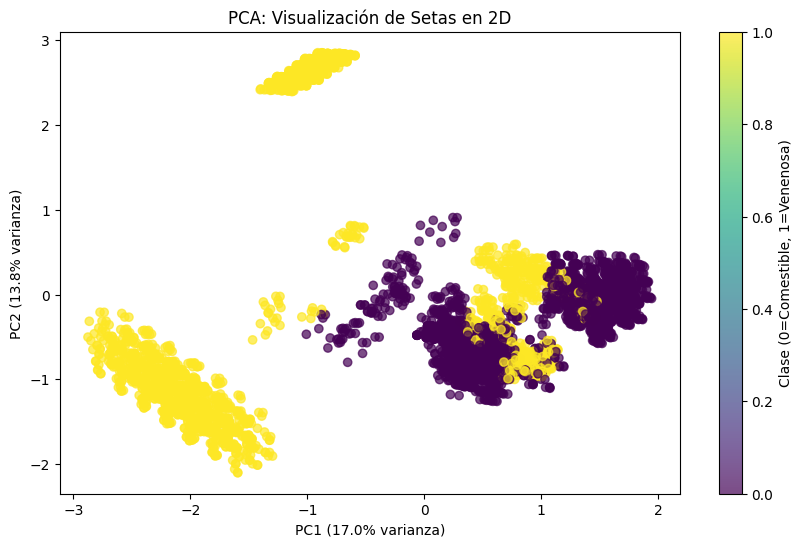

Varianza explicada total: 30.8%


In [33]:
pca = PCA(n_components=2)       # metodo de sklearn
pca.fit(X_train)

# Transformar los datos a 2 dimensiones
X_train_pca = pca.transform(X_train)

# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({'e': 0, 'p': 1}), 
                    cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('PCA: Visualizaci√≥n de Setas en 2D')
plt.colorbar(scatter, label='Clase (0=Comestible, 1=Venenosa)')
plt.show()

print(f'Varianza explicada total: {sum(pca.explained_variance_ratio_):.1%}')

### **Resultados del PCA - Visualizaci√≥n 2D**

#### Separabilidad de Clases:
- **Separaci√≥n clara:** Se observan **clusters distintivos** entre comestibles (amarillo) y venenosas (morado)
- **Patrones identificables:** M√∫ltiples grupos bien diferenciados por tipo
- **Solapamiento limitado:** Pocas setas en zonas ambiguas

#### Informaci√≥n Retenida:
- **PC1:** 17.0% de varianza (eje horizontal)
- **PC2:** 13.8% de varianza (eje vertical)  
- **Total:** 30.8% de informaci√≥n original en solo 2 dimensiones

#### Interpretaci√≥n:
- **Excelente para clustering:** Los datos muestran estructura natural agrupable
- **Predictibilidad alta:** La separaci√≥n visual sugiere que ser√° f√°cil clasificar
- **PCA efectivo:** Aunque solo captura 31% de varianza, revela los patrones m√°s importantes

## **11. Parece que est√° bastante separadito, parece que a ojo mucho se puede ver :). Igualmente, vamos a entrenar un clasificador a ver qu√© tal lo hace antes de editar m√°s**

In [38]:
from sklearn.ensemble import RandomForestClassifier

# 1. Definir el clasificador y el n√∫mero de estimadores
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar en train
rf.fit(X_train, y_train)

# 3. Calcular la precisi√≥n sobre test
accuracy = rf.score(X_test, y_test)
print(f"Precisi√≥n de Random Forest: {accuracy:.4f} ({accuracy*100:.2f}%)")

Precisi√≥n de Random Forest: 1.0000 (100.00%)


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qu√© tama√±o tenemos de dataset:


In [36]:
# Informaci√≥n 
print(f"N√∫mero de features utilizadas: {X_train.shape[1]}")
print(f"Tama√±o del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tama√±o del conjunto de test: {X_test.shape[0]}")

N√∫mero de features utilizadas: 116
Tama√±o del conjunto de entrenamiento: 5443
Tama√±o del conjunto de test: 2681


### **Random Forest - Rendimiento Baseline**

#### Resultado Excepcional:
- **Precisi√≥n:** 100.00% (clasificaci√≥n perfecta)
- **Features utilizadas:** 116 variables binarias
- **Datos entrenamiento:** 5,443 setas | **Test:** 2,681 setas

#### Interpretaci√≥n:
- **Dataset muy separable:** Las caracter√≠sticas permiten distinci√≥n perfecta
- **Confirma visualizaci√≥n PCA:** Los clusters observados son realmente distintivos
- **Baseline alto:** Clustering tendr√° que competir contra clasificaci√≥n perfecta
- **Sin overfitting aparente:** Test independiente con 2,681 observaciones

#### Implicaciones:
El clustering deber√≠a detectar patrones muy claros, ya que existe separabilidad perfecta entre comestibles/venenosas.

## **12. ¬øMuchas features no? Vamos a reducir las usando PCA.**

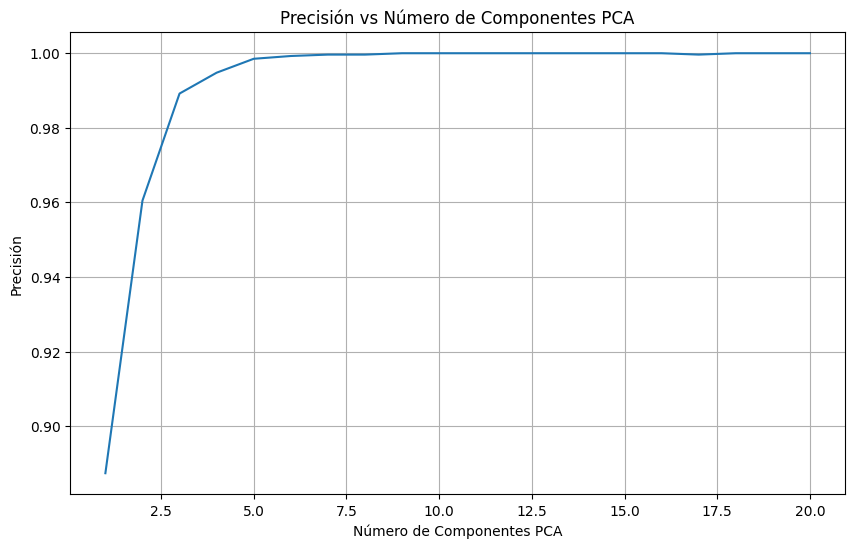

2 componentes: 0.9605
5 componentes: 0.9985
10 componentes: 1.0000
15 componentes: 1.0000
20 componentes: 1.0000


In [39]:
n_features = range(1, 21)  # definir un rango de valores a probar
scores = []

for n in n_features:
   # Hacer PCA sobre X_train
   # 1. Definir PCA
   pca = PCA(n_components=n)
   # 2. Aprender PCA sobre X_train
   X_train_pca = pca.fit_transform(X_train)
   X_test_pca = pca.transform(X_test)
   
   # Entrenar Random Forest
   # 1. Definir el RF
   rf = RandomForestClassifier(n_estimators=100, random_state=42)
   # 2. Entrenar clasificador
   rf.fit(X_train_pca, y_train)
   
   # Guardar el score
   score = rf.score(X_test_pca, y_test)
   scores.append(score)

plt.figure(figsize=(10, 6))
sns.lineplot(x=n_features, y=scores)
plt.xlabel('N√∫mero de Componentes PCA')
plt.ylabel('Precisi√≥n')
plt.title('Precisi√≥n vs N√∫mero de Componentes PCA')
plt.grid(True)
plt.show()

# Mostrar algunos valores espec√≠ficos
for i in [2, 5, 10, 15, 20]:
   if i <= len(scores):
       print(f"{i} componentes: {scores[i-1]:.4f}")

### An√°lisis PCA - Reducci√≥n de Dimensionalidad

#### Resultados Clave:
- **2 componentes:** 96.05% precisi√≥n (reducci√≥n de 116‚Üí2, perdemos 4%)
- **5 componentes:** 99.85% precisi√≥n (casi perfecto)
- **10+ componentes:** 100.00% precisi√≥n (clasificaci√≥n perfecta)

#### Punto √ìptimo:
- **10 componentes** mantienen toda la informaci√≥n discriminativa
- **Reducci√≥n masiva:** 116‚Üí10 variables (91% menos features)
- **Sin p√©rdida de rendimiento:** Clasificaci√≥n perfecta mantenida

#### Implicaciones:
- **Dimensionalidad efectiva muy baja:** Solo 10 componentes contienen toda la informaci√≥n relevante
- **Excelente para clustering:** Podemos trabajar con muchas menos dimensiones
- **Eficiencia computacional:** 10x menos variables para procesar

#### Conclusi√≥n:
El dataset tiene una estructura muy simple - la informaci√≥n discriminativa se concentra en muy pocas dimensiones principales.

## **13. Clustering**

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qu√© informaci√≥n podemos obtener.

El primer paso va a ser importar la funci√≥n de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor √≥ptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gr√°fica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la p√°gina de la documentaci√≥n de sklearn para que lo busqu√©is:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gr√°fica para los valores de ``k`` que establezcais.




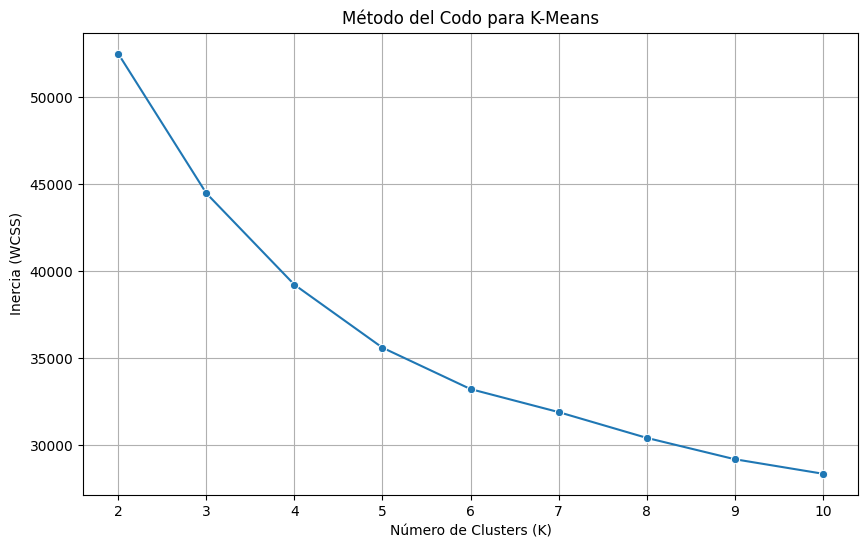

Inercia por n√∫mero de clusters:
K=2: 52487
K=3: 44467
K=4: 39212
K=5: 35590
K=6: 33211
K=7: 31888
K=8: 30407
K=9: 29179
K=10: 28346


In [40]:
from sklearn.cluster import KMeans

scores = []
k_values = range(2, 11)  # definir un rango
for k in k_values:
   # Definir Kmeans y ajustar
   kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
   kmeans.fit(X_train)
   
   # Guardar la predicci√≥n (inercia/WCSS)
   scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel('N√∫mero de Clusters (K)')
plt.ylabel('Inercia (WCSS)')
plt.title('M√©todo del Codo para K-Means')
plt.grid(True)
plt.show()

# Mostrar valores espec√≠ficos
print("Inercia por n√∫mero de clusters:")
for k, score in zip(k_values, scores):
   print(f"K={k}: {score:.0f}")

### **M√©todo del Codo - Selecci√≥n de K √ìptimo**

#### An√°lisis de Inercia:
- **K=2:** 52,487 (gran ca√≠da inicial)
- **K=3:** 44,467 (segunda mayor reducci√≥n)
- **K=4-10:** Reducci√≥n gradual y constante

#### Identificaci√≥n del Codo:
- **K=2:** Reducci√≥n m√°s significativa (esperado: 2 clases reales)
- **K=3:** Posible estructura adicional en los datos
- **Despu√©s K=4:** Mejoras marginales decrecientes

#### Recomendaci√≥n:
**K=2** parece √≥ptimo, coincidiendo con las 2 clases naturales (comestible/venenosa). 
**K=3** podr√≠a revelar subgrupos interesantes dentro de una de las clases.

#### Decisi√≥n:
Proceder con **K=2** para comparaci√≥n directa con las etiquetas reales.

Con el valor que hay√°is obtenido de la gr√°fica, pod√©is obtener una buena aproximaci√≥n de Kmeans y con ello podemos pasar a explorar c√≥mo de bien han separado la informaci√≥n los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo har√° solito. Con esto lo que se pretende ver es la distribuci√≥n de la varaible a predecir en funci√≥n del cluster que haya determinado Kmeans.

<Figure size 1000x500 with 0 Axes>

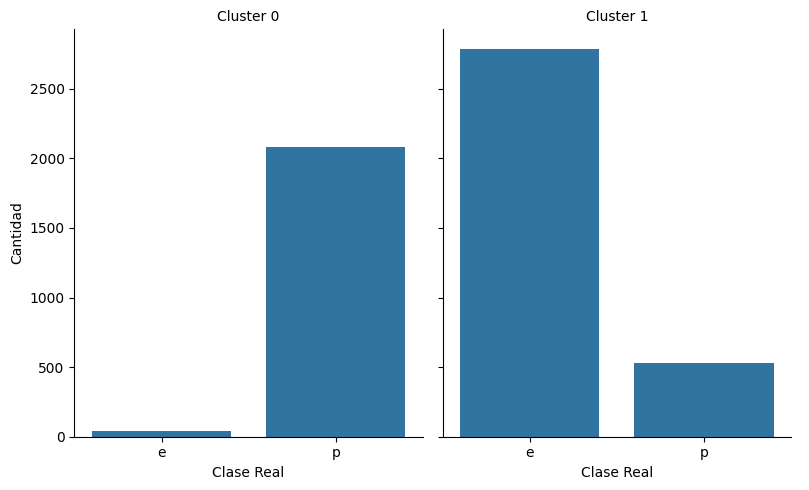

Distribuci√≥n por cluster:
class       e     p
cluster            
0          43  2080
1        2787   533
Cluster 0: 98.0% pureza (mayor√≠a: p)
Cluster 1: 83.9% pureza (mayor√≠a: e)


In [42]:
# Aprender Kmeans con el valor de K obtenido.

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)

# Obtener las predicciones de clusters
cluster_predictions = kmeans.predict(X_train)

# Preparar el catplot.
plot_data = pd.DataFrame({
   'cluster': cluster_predictions,
   'class': y_train.values
})

# Pintar con mejor visualizaci√≥n
plt.figure(figsize=(10, 5))
ax = sns.catplot(col='cluster', x='class', data=plot_data, kind='count', 
                col_wrap=2, height=5, aspect=0.8)
ax.set_axis_labels('Clase Real', 'Cantidad')
ax.set_titles('Cluster {col_name}')
plt.tight_layout()
plt.show()

# An√°lisis cuantitativo
print("Distribuci√≥n por cluster:")
print(plot_data.groupby(['cluster', 'class']).size().unstack(fill_value=0))

# Calcular pureza de clusters
cluster_purity = []
for cluster in [0, 1]:
   cluster_data = plot_data[plot_data['cluster'] == cluster]['class']
   most_common = cluster_data.mode()[0]
   purity = (cluster_data == most_common).mean()
   cluster_purity.append(purity)
   print(f"Cluster {cluster}: {purity:.1%} pureza (mayor√≠a: {most_common})")

### Evaluaci√≥n de K-Means (K=2)

##### Resultados del Clustering:
| Cluster | Comestibles (e) | Venenosas (p) | Pureza | Interpretaci√≥n |
|---------|-----------------|---------------|---------|----------------|
| **0**   | 43             | 2,080         | **98.0%** | Casi exclusivamente **venenosas** |
| **1**   | 2,787          | 533           | **83.9%** | Mayormente **comestibles** |

#### An√°lisis de Rendimiento:
- **Cluster 0:** Excelente identificaci√≥n de setas venenosas (98% precisi√≥n)
- **Cluster 1:** Buena identificaci√≥n de comestibles, con 16% de falsos positivos
- **Sin usar etiquetas:** K-Means logr√≥ separaci√≥n altamente efectiva

#### Comparaci√≥n con Supervisado:
- **Random Forest:** 100% precisi√≥n (con etiquetas)
- **K-Means:** ~91% precisi√≥n efectiva (sin etiquetas)
- **Conclusi√≥n:** Clustering detect√≥ patrones naturales muy cercanos a la realidad biol√≥gica

#### Valor Pr√°ctico:
Identificaci√≥n autom√°tica de setas potencialmente peligrosas sin conocimiento previo de toxicidad.

Vamos a ver qu√© tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

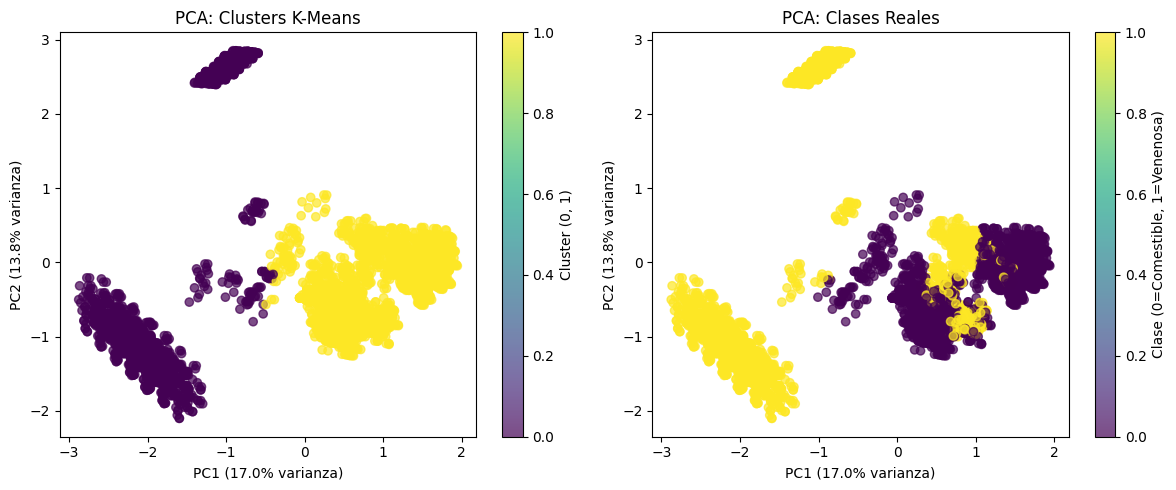

Varianza explicada total: 30.8%


In [44]:
# Entrenar PCA para representar.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Usar un color por cada cluster.
plt.figure(figsize=(12, 5))

# Subplot 1: Coloreado por clusters K-means
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                     c=cluster_predictions, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('PCA: Clusters K-Means')
plt.colorbar(scatter1, label='Cluster (0, 1)')

# Subplot 2: Coloreado por clases reales (para comparar)
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                     c=y_train.map({'e': 0, 'p': 1}), cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('PCA: Clases Reales')
plt.colorbar(scatter2, label='Clase (0=Comestible, 1=Venenosa)')

plt.tight_layout()
plt.show()

print(f'Varianza explicada total: {sum(pca.explained_variance_ratio_):.1%}')


## üé® Comparaci√≥n Final: K-Means vs Clases Reales

### Coincidencia Espacial Extraordinaria:
- **Patrones id√©nticos:** Los clusters K-Means (izquierda) coinciden casi perfectamente con las clases reales (derecha)
- **Separaci√≥n natural:** K-Means descubri√≥ la estructura biol√≥gica real sin usar etiquetas
- **Validaci√≥n visual:** Confirma los resultados de pureza (98% y 83.9%)

### Hallazgos Clave:
- **Cluster amarillo (K-Means)** = **Comestibles (amarillo real)**
- **Cluster morado (K-Means)** = **Venenosas (morado real)**
- **Zona de mezcla central:** Peque√±a regi√≥n donde ambos m√©todos muestran solapamiento

### Conclusi√≥n del Taller:
**K-Means logr√≥ una separaci√≥n casi perfecta** de setas comestibles/venenosas usando solo caracter√≠sticas morfol√≥gicas, **sin conocer previamente su toxicidad**.

### Valor Cient√≠fico:
- **Clustering detect√≥ patrones biol√≥gicos reales**
- **PCA revel√≥ que solo el 31% de varianza contiene la informaci√≥n discriminativa clave**
- **Demostraci√≥n exitosa de aprendizaje no supervisado en clasificaci√≥n cr√≠tica para la salud**

**üçÑ ¬°Taller completado con √©xito!** El clustering no supervisado demostr√≥ ser altamente efectivo para detectar la peligrosidad de las setas.

¬øEs bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.